## Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset


In [2]:
data = pd.read_csv("/home/rupeek/Desktop/ML &AI/Heart disease prediction/heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Exploring the Data Set

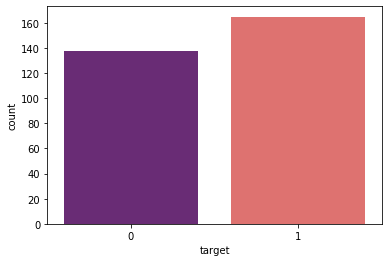

In [5]:
sns.countplot(x="target", data = data, palette="magma")

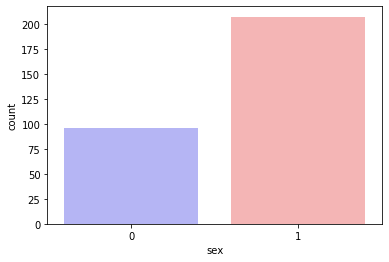

In [6]:
sns.countplot(x="sex", data = data, palette="bwr")

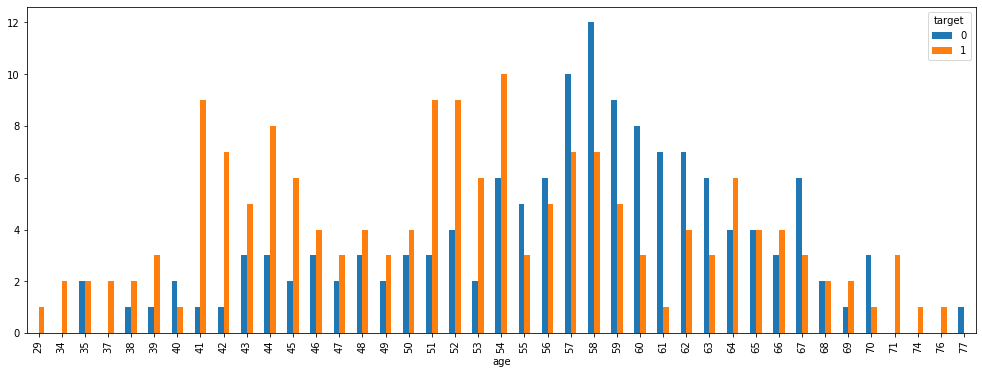

In [7]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(17,6))

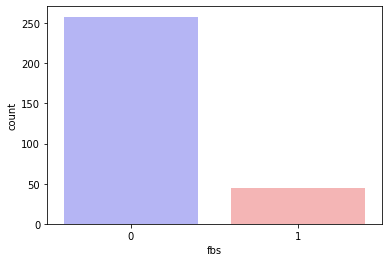

In [8]:
sns.countplot(x="fbs", data = data, palette="bwr")

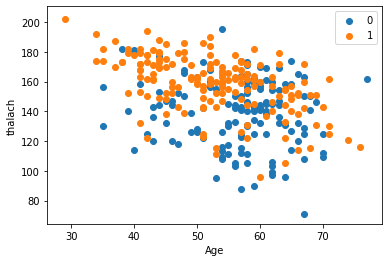

In [9]:
plt.scatter(data.age[data.target==0],data.thalach[data.target==0])
plt.scatter(data.age[data.target==1],data.thalach[data.target==1])
plt.legend(["0","1"])
plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()

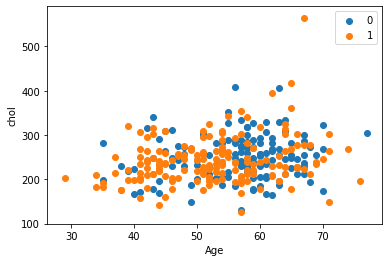

In [10]:
plt.scatter(data.age[data.target==0],data.chol[data.target==0])
plt.scatter(data.age[data.target==1],data.chol[data.target==1])
plt.legend(["0","1"])
plt.xlabel("Age")
plt.ylabel("chol")
plt.show()

## Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
sc = StandardScaler()
data[["age","trestbps","chol","thalach","oldpeak"]] = sc.fit_transform(data[["age","trestbps","chol","thalach","oldpeak"]])

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [14]:
data[["sex","cp","fbs","restecg","exang","slope","ca","thal"]] = data[["sex","cp","fbs","restecg","exang","slope","ca","thal"]].astype(object)

## Creating dummy variables

In [15]:
data=pd.get_dummies(data)


In [16]:
X = data.copy()
y = data["target"]

In [17]:
X.drop(columns="target",axis=1,inplace=True)

In [18]:
X = X.values
y=y.values

In [19]:
X

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Splitting data into train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [23]:
X_train.shape

(257, 30)

In [24]:
from sklearn.metrics import classification_report

# Applying KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
cm = confusion_matrix(y_test,pred)
cm

array([[18,  5],
       [ 5, 18]])

In [31]:
ac=accuracy_score(y_test, pred)
ac

0.782608695652174

In [32]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.78      0.78      0.78        23

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



# Applying Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier


In [34]:
dt = DecisionTreeClassifier()

In [35]:
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
pred1 = dt.predict(X_test)

In [37]:
cm1=confusion_matrix(y_test,pred1)
cm1

array([[17,  6],
       [ 5, 18]])

In [38]:
ac1=accuracy_score(y_test, pred1)
ac1

0.7608695652173914

In [39]:
print(classification_report(pred1,y_test))


              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.78      0.75      0.77        24

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46



# Applying Support Vector Machine

In [40]:
from sklearn.svm import SVC


In [41]:
svc = SVC()

In [42]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
pred2 = svc.predict(X_test)

In [44]:
cm2=confusion_matrix(y_test,pred2)
cm2

array([[18,  5],
       [ 3, 20]])

In [45]:
ac2=accuracy_score(y_test, pred2)
ac2

0.8260869565217391

In [46]:
print(classification_report(pred2,y_test))


              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.87      0.80      0.83        25

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.83      0.83      0.83        46



## Applying Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier


In [48]:
rfc = RandomForestClassifier()


In [49]:
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
pred3 = rfc.predict(X_test)


In [51]:
cm3=confusion_matrix(y_test,pred3)
cm3

array([[18,  5],
       [ 4, 19]])

In [52]:
ac3=accuracy_score(y_test, pred3)
ac3

0.8043478260869565

In [53]:
print(classification_report(pred3,y_test))


              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.83      0.79      0.81        24

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



# Applying Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB


In [55]:
nb = GaussianNB()


In [56]:
nb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
pred4 = nb.predict(X_test)


In [58]:
cm4=confusion_matrix(y_test,pred4)
cm4

array([[17,  6],
       [ 4, 19]])

In [59]:
ac4=accuracy_score(y_test, pred4)
ac4

0.782608695652174

In [60]:
print(classification_report(pred4,y_test))


              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.83      0.76      0.79        25

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



# Accuracy

Accuracy of models


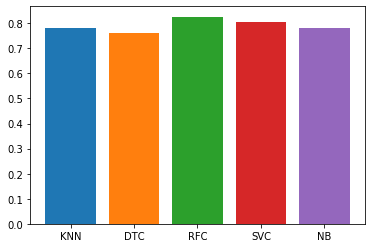

In [61]:
print("Accuracy of models")

plt.bar(0,ac)
plt.bar(1,ac1)
plt.bar(2,ac2)
plt.bar(3,ac3)
plt.bar(4,ac4)

plt.xticks([0,1,2,3,4], ['KNN','DTC','RFC','SVC','NB'])
plt.show()

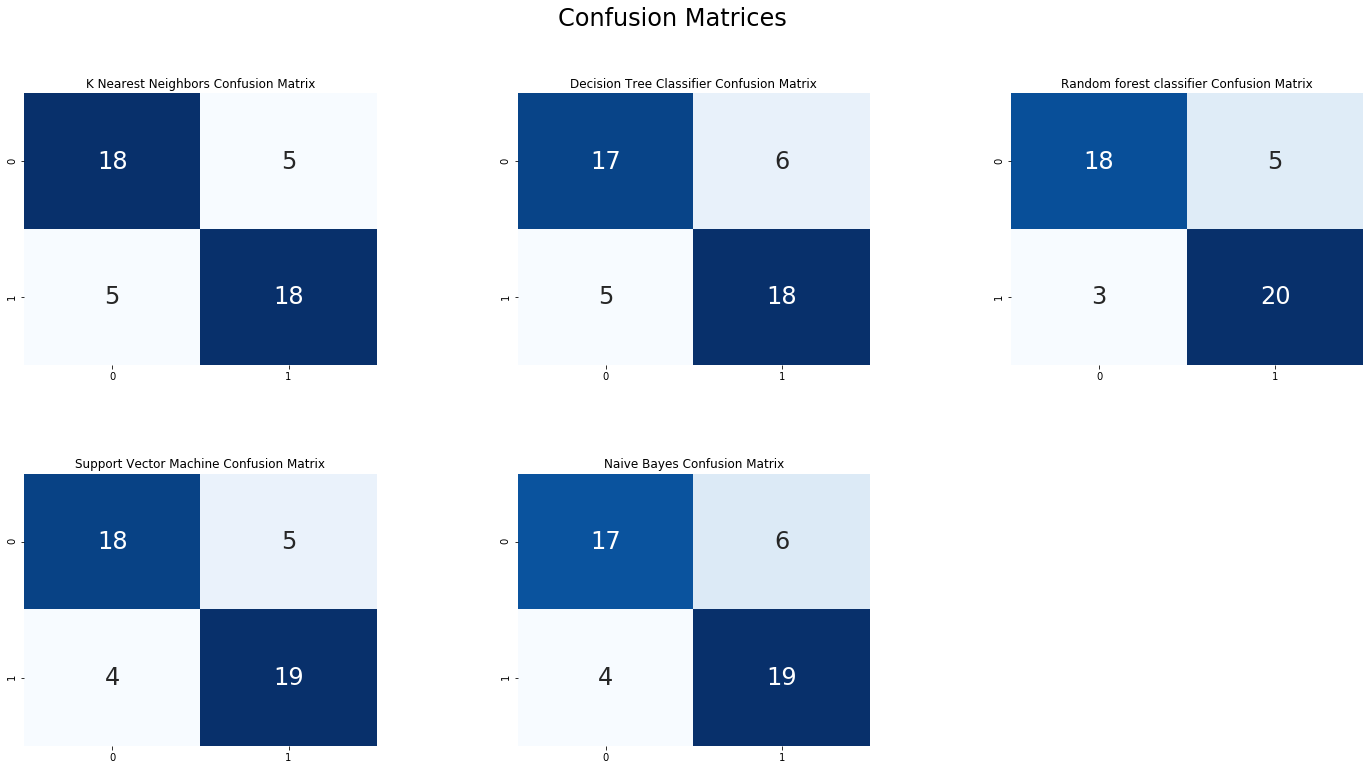

In [62]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random forest classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")

sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()